# CSME2 Bonus Point Assignment II Parts 1 and 2
<div style="text-align: right;font-size: 0.8em">Document Version 2.0.0, released 2022-01-29</div>
For task instructions, refer to the assignment PDF.

* The parts of the code you are to implement are indicated via `# FILL HERE` comments.
* Some cells create export file in the `outputs/` folder. _Include whole `outputs/` folder in your submission_.
* Make sure you restart the notebook's kernel and run everything in one go before submission
* DO NOT CLEAR THE OUTPUT of the notebook you are submitting.

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

ROOT = Path('.')
DATA = ROOT / 'data'
EXAMPLE_IMAGE = DATA / 'example_image.png'
OUTPUT = ROOT / 'output'

OUTPUT.mkdir(exist_ok=True)

seed = 42

## Padding

In [134]:
def add_padding(image, P):

    ##### FILL HERE #####
    #### Question 1.1 ###
    padding_image = image
    B,h,w,F = image.shape
    padded_image = np.array([])
    for n in range(B):
        temp_image  = np.vstack((np.zeros((P,w,F)),padding_image[n],np.zeros((P,w,F))))
        temp_image = np.hstack((np.zeros((2*P+h,P,F)),temp_image,np.zeros((2*P+h,P,F))))
        padded_image = np.append(padded_image,temp_image)
    #####################
    padded_image = padded_image.reshape((B,h+2*P,w+2*P,F))
    return padded_image

## Convolve

In [135]:
def convolve(kernels, images, S):
    batch_size, h_in, w_in, F_in = images.shape
    F_out = kernels.shape[3]
    K = kernels.shape[0]
    assert F_in == kernels.shape[2], f'Size mismatch: images and kernels have different number of input filters ({F_in} != {kernels.shape[2]})'
    assert kernels.shape[0] == kernels.shape[1], 'Nonsquare kernel'
    
    h_out = (h_in - K) / S + 1
    w_out = (w_in - K) / S + 1
    
    assert int(h_out) == h_out and int(w_out) == w_out, 'Incompatible dimensions'
    h_out = int(h_out)
    w_out = int(w_out)
    
    ##### FILL HERE #####
    #### Question 1.2 ###
    out = np.zeros((batch_size,h_out,w_out,F_out))
    for n in range(batch_size):
        for p in range(h_out):
            for q in range(w_out):
                for i in range(K):
                    for j in range(K):
                        out[n,p,q] += images[n,p*S+i,q*S+j]@kernels[i,j]
    #####################
    return out

## Filter Example

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


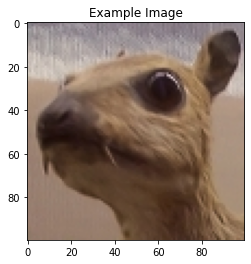

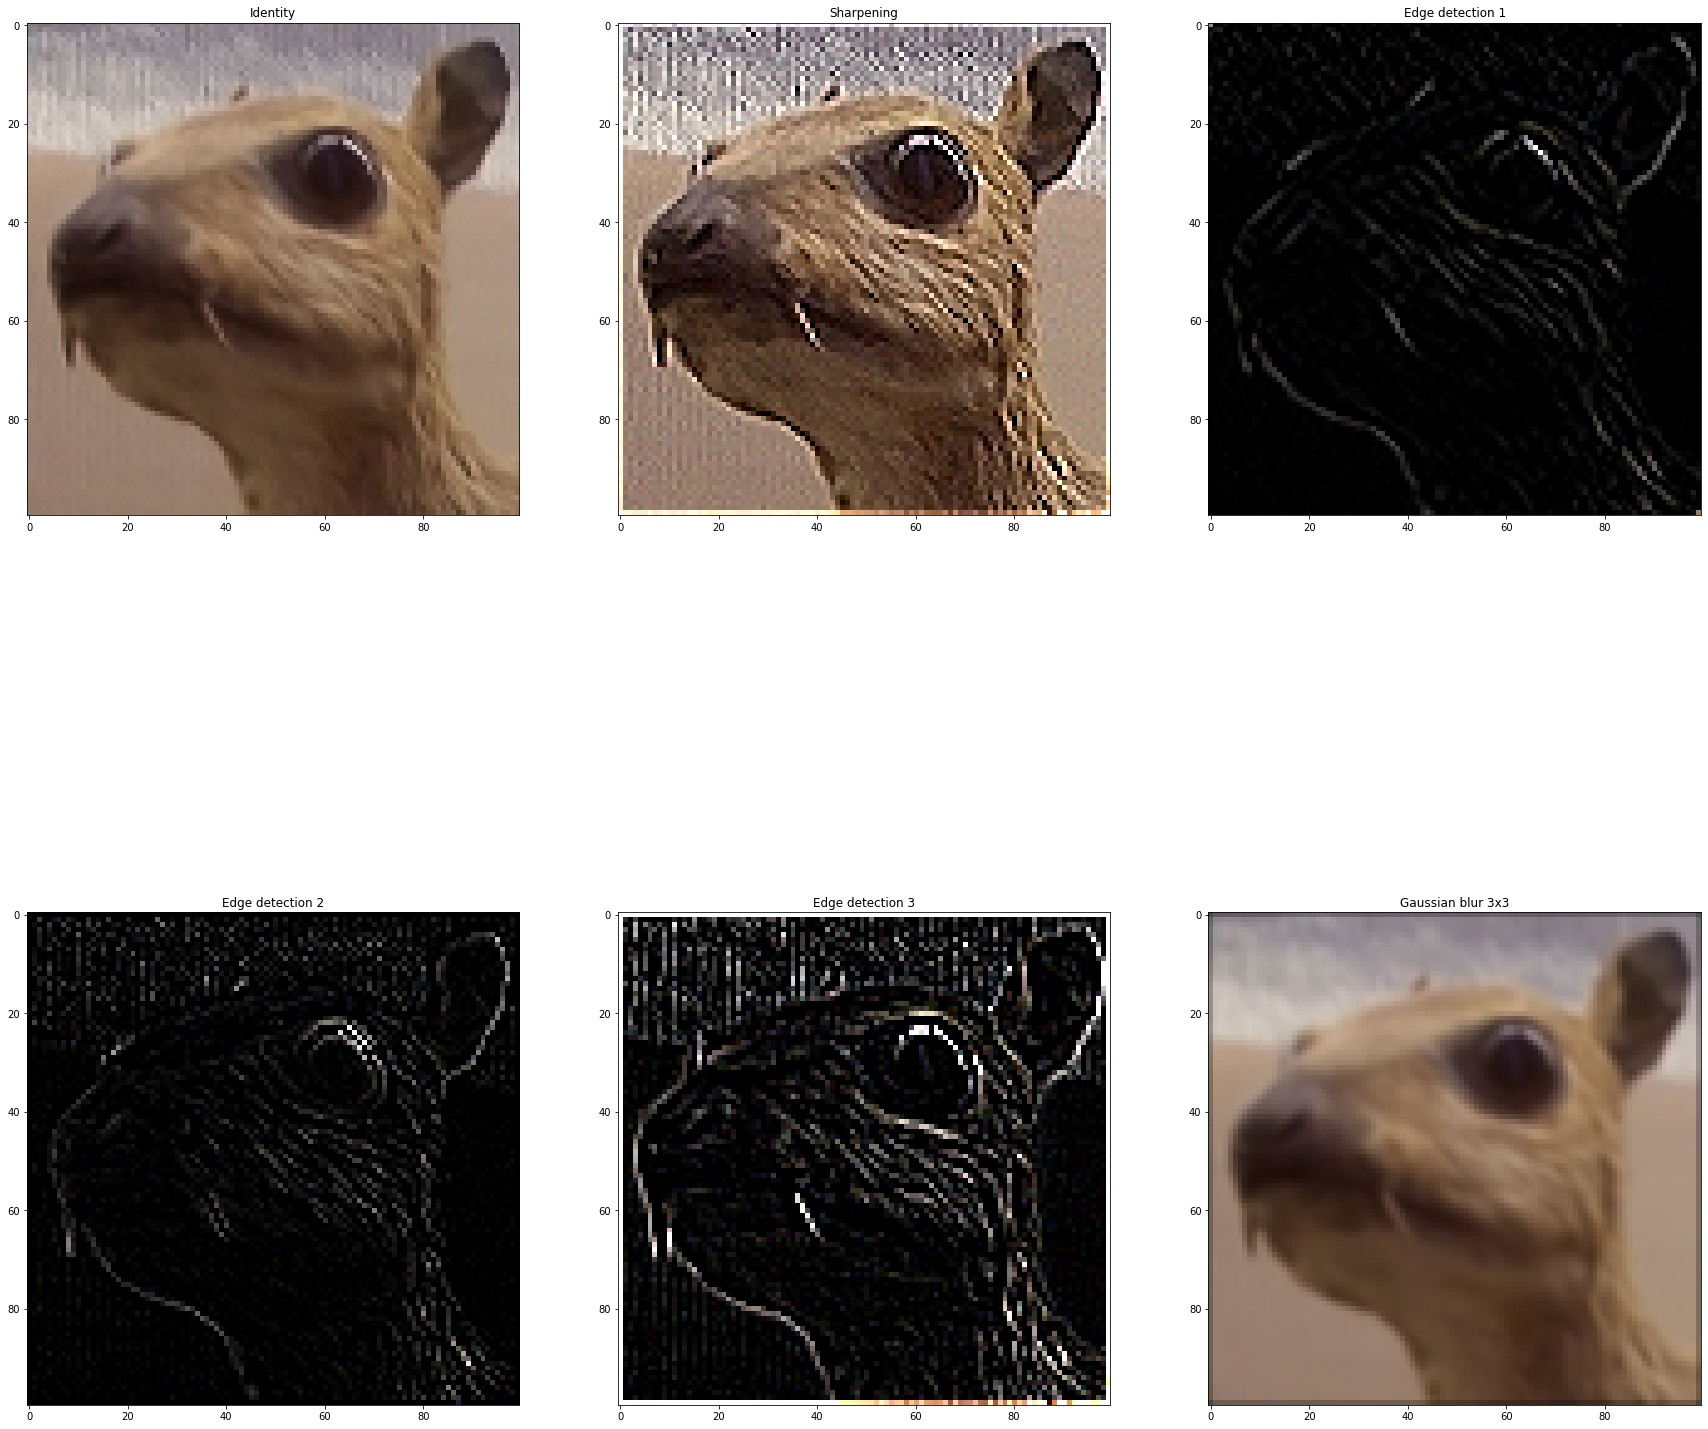

In [136]:
def filter_example():
    example_img = mpimg.imread(EXAMPLE_IMAGE)
    plt.imshow(example_img)
    plt.title('Example Image')
    
    # Add a batch dimension to match with our requirements
    example_img = example_img[np.newaxis, :, :, :]

    ##### FILL HERE #####
    #### Question 1.3 ###
    filtered_images = np.zeros((6, *example_img.shape[1:]), dtype=float)
    ######################
    images = add_padding(example_img,1)
    kernel = np.zeros((6,3,3))
    kernel[0] = np.array([[0,0,0],[0,1,0],[0,0,0]])
    kernel[1] = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    kernel[2] = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
    kernel[3] = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    kernel[4] = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    kernel[5] = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
    kernels  = np.zeros((6,3,3,3,3))
    for n in range(6):
        for i in range(3):
            for j in range(3):
                kernels[n,i,j] = np.eye(3,3)*kernel[n][i,j]
    for i in range(6):
        filtered_images[i] = convolve(kernels[i],images,1)

    # You may need to re-order this list to have the correct titles
    names = ['Identity', 'Sharpening', 'Edge detection 1', 'Edge detection 2', 'Edge detection 3', 'Gaussian blur 3x3']
    fig, axs = plt.subplots(2, 3, figsize=(30,30))

    for b in range(filtered_images.shape[0]):
        i = b // 3
        j = b % 3
        axs[i, j].imshow(filtered_images[b, :, :, :])
        axs[i, j].set_title(names[b])

                               
filter_example()

## Convolutional Network

In [137]:
class Layer:
    def forward(self, x):
        """Forward pass of the layer.
        For convenience, input and output are stored in the layer. 

        Args:
            x: Input for this layer. Shape is (batch_size, num_inputs).

        Returns:
            x: Output of this layer. Shape is (batch_size, num_outputs).
        """
        raise NotImplementedError

    def backward(self, gradient):
        """Backward pass of the layer.
        The incoming gradients are stored in the layer. 

        Args:
            gradient: Incoming gradient from the next layer. Shape is (batch_size, num_outputs).

        Returns:
            gradient: Gradient passed to previous layer. Shape is (batch_size, num_inputs).
        """
        raise NotImplementedError

    def update(self, learn_rate):
        """Perform weight update based on previously stored input and gradients.

        Args:
            learn_rate: Learn rate to use for the update.
        """
        raise NotImplementedError

In [138]:
def dilate(image, D):
    
    ##### FILL HERE #####
    #### Question 2.4 ###
    #####################
    
    return image

In [139]:
class Conv2D(Layer):
    def __init__(self, K, P, S, F_in, F_out, seed=None):
        self.K = K
        self.P = P
        self.S = S
        self.F_in = F_in
        self.F_out = F_out
        
        # Use He initializer
        rnd = np.random.RandomState(seed).randn(K, K, F_in, F_out)
        self.kernels = rnd * np.sqrt(2 / K*K*F_in)
        # Initialize bias with 0
        self.bias = np.zeros((1, 1, 1, F_out), dtype=float)
        
        self.gradient = None # Incoming gradient from next layer
        self.grad_w = None # Gradient w.r.t. the kernels
        self.grad_b = None # Gradient w.r.t. the bias

    def forward(self, x):
        self.x = x
        
        ##### FILL HERE #####
        #### Question 1.4 ###
        #####################
        x = add_padding(x,self.P)
        x = convolve(self.kernels,x,self.S)
        B,h_out,w_out,F_out = x.shape
        for n in range(B):
            for i in range(h_out):
                for j in range(w_out):
                    x[n,i,j] += self.bias[n,i,j]
        return x
    
    def backward(self, gradient):
        self.gradient = gradient
        
        ##### FILL HERE #####
        #### Question 2.5 ###
        #####################
        
        return gradient
    
    def update(self, learning_rate):
        
        ##### FILL HERE #####
        #### Question 2.5 ###
        pass
        #####################


In [140]:
class ReLU(Layer):
    def forward(self, x):
        self.x = x
        
        ##### FILL HERE #####
        #### Question 1.5 ###
        #####################
        return (x>0)*x
    
    def backward(self, gradient):
        self.gradient = gradient
        
        ##### FILL HERE #####
        #### Question 2.2 ###
        #####################
    
    def update(self, learning_rate):
        # This class does not have parameters
        pass

In [141]:
class MaxPooling(Layer):
    def __init__(self, K, S):
        # We assume that all windows are disjoint
        if K < S:
            raise NotImplementedError(
                'This implementation of pooling only supports disjoint pooling windows (K >= S) for backpropagation'
            )
        self.K = K
        self.S = S
    
    def forward(self, x):
        self.x = x
        
        ##### FILL HERE #####
        #### Question 1.6 ###
        #####################

        batch_size, h_in, w_in, F_in = x.shape
        h_out = (h_in - self.K) / self.S + 1
        w_out = (w_in - self.K) / self.S + 1
        F_out = F_in
        h_out = int(h_out)
        w_out = int(w_out)
        out = np.zeros((batch_size,h_out,w_out,F_out))
        for n in range(batch_size):
            for p in range(h_out):
                for q in range(w_out):
                    for f in range(F_out):
                        out[n,p,q,f] = x[n,p*self.S:p*self.S+self.K,q*self.S:q*self.S+self.K,f]
        x = out



        ##### FILL HERE #####
        #### Question 2.3 ###
        # You may need to add
        # things here
        #####################

        return x

    def backward(self, gradient):
        self.gradient = gradient
        
        ##### FILL HERE #####
        #### Question 2.3 ###
        #####################
        
        return gradient
    
    def update(self, learning_rate):
        # This class does not have parameters
        pass


In [142]:
class FullyConnected(Layer):
    def __init__(self, input_dim, output_dim, seed=None):
        # Initialize weights with the He initializer
        rnd = np.random.RandomState(seed).randn(1, 1, input_dim, output_dim)
        self.w = rnd * np.sqrt(2 / input_dim)

        # Initialize bias with zeros
        self.b = np.zeros((1, 1, output_dim))

        self.input_dim = input_dim
        self.output_dim = output_dim
        
        self.gradient = None # Incoming gradient from next layer
        self.grad_w = None # Gradient w.r.t. the weights
        self.grad_b = None # Gradient w.r.t. the bias
    
    def forward(self, x):
        batch_size = x.shape[0]
        x = x.reshape(batch_size, 1, 1, -1)
        self.x = x  # Store input

        ##### FILL HERE #####
        #### Question 1.7 ###
        #####################
        
        return x

    def backward(self, gradient):
        """Backward pass of the layer."""
        self.gradient = gradient  # Store incoming gradient

        ##### FILL HERE #####
        #### Question 2.1 ###
        #####################

        return gradient

    def update(self, learn_rate):
        """Perform weight update"""

        ##### FILL HERE #####
        #### Question 2.1 ###
        pass
        #####################

In [143]:
def Sigmoid(Layer):
    def __forward__(self, x):
        return 1 / (1 + np.exp(-x))

In [144]:
class FeedForwardNet:
    def __init__(self, *layers):
        self.layers = layers
        
    def forward(self, x):
        """
        Forward pass through the entire network
        """
        ##### FILL HERE #####
        #### Question 1.8 ###
        #####################
        
        return x
    
    def backward(self, gradient):
        """
        Backward pass through the entire network
        """
        # We don't backpropagate through the sigmoid layer, so we start at index -2
        for layer in self.layers[-2::-1]:
            gradient = layer.backward(gradient)
    
    def training_step(self, x, target, learning_rate):
        """
        Takes one minibatch training step
        """
        # Assumes sigmoid last layer with binary cross-entropy loss
        pred = self.forward(x)
        target = target.reshape(x.shape)
        gradient = target * (1 - pred) + (1 - target) * pred
        gradient /= N

        self.backward(gradient)
        for layer in self.layers:
            layer.update(learning_rate)
